<a href="https://colab.research.google.com/github/GalangSuryaputra/Last-Project-PSDS/blob/main/Last_Project_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Transactions Dataset
Project ini dibuat berdasarkan pada penugasan akhir di Pusat Studi Data Sains Program Studi Matematika, Fakultas Sains dan Teknologi Terapan, Universitas Ahmad dahlan

Dataset *Bank Transactions* ini dibuat untuk menganalisis ATM yang digunakan. Analisis ini dapat digunakan pihak Bank untuk menentukan Lokasi mana yang ATM nya paling banyak digunakan (berhubungan dengan Pertanyaan Analisis).

## Pertanyaan Analisis Data
1. ATM yang paling sering digunakan untuk penarikan
2. ATM yang paling banyak digunakan untuk penarikan dengan kartu XYZ
3. ATM yang Paling banyak digunakan untuk penarikan kartu lain


## Data Preparation

In [ ]:
from operator import itemgetter
from networkx.algorithms import community
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca file yang sudah di import
bank = pd.read_csv("bank.csv")
# Keterangan isi index 
print(bank.keys())
bank

Index(['ATM Name', 'Transaction Date', 'No Of Withdrawals',
       'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
       'Total amount Withdrawn', 'Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card', 'Weekday', 'Festival Religion',
       'Working Day', 'Holiday Sequence'],
      dtype='object')


,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH
...,...,...,...,...,...,...,...,...,...,...,...,...
11584,Big Street ATM,29-09-2017,137,34,103,468800,146200,322600,FRIDAY,H,H,WHH
11585,Mount Road ATM,29-09-2017,79,27,52,305100,172500,132600,FRIDAY,H,H,WHH
11586,Airport ATM,29-09-2017,117,77,40,709900,576800,133100,FRIDAY,H,H,WHH
11587,KK Nagar ATM,29-09-2017,76,48,28,408700,279900,128800,FRIDAY,H,H,WHH


In [ ]:
# Mengambil Beberapa Data Untuk Di Analisis
transactions = pd.DataFrame(bank[['ATM Name','Transaction Date','Total amount Withdrawn','Amount withdrawn XYZ Card','Amount withdrawn Other Card']])
transactions.sort_values(by=['Transaction Date'])

,ATM Name,Transaction Date,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card
0,Big Street ATM,1/1/2011,123800,41700,82100
1,Mount Road ATM,1/1/2011,767900,270900,497000
2,Airport ATM,1/1/2011,503400,347700,155700
3,KK Nagar ATM,1/1/2011,945300,532600,412700
4,Christ College ATM,1/1/2011,287700,148200,139500
...,...,...,...,...,...
11485,Big Street ATM,9/9/2017,552300,175600,376700
11486,Mount Road ATM,9/9/2017,341200,139100,202100
11487,Airport ATM,9/9/2017,682300,542200,140100
11488,KK Nagar ATM,9/9/2017,633300,430400,202900


In [ ]:
# 1. Jumlah Total Penarikan Masing-masing ATM
atm1 = bank.groupby(['ATM Name'])
atm_penarikan = atm1['Total amount Withdrawn'].sum()
atm_penarikan

ATM Name
Airport ATM            999511100
Big Street ATM         726419500
Christ College ATM    1311309000
KK Nagar ATM          1854299300
Mount Road ATM        1161463900
Name: Total amount Withdrawn, dtype: int64

In [ ]:
# 2. Jumlah Total Penarikan Dengan Kartu XYZ Masing-masing ATM
atm2 = bank.groupby(['ATM Name'])
atm_penarikan_XYZ = atm2['Amount withdrawn XYZ Card'].sum()
atm_penarikan_XYZ

ATM Name
Airport ATM            827094200
Big Street ATM         323523900
Christ College ATM     639314100
KK Nagar ATM          1389992600
Mount Road ATM         697295100
Name: Amount withdrawn XYZ Card, dtype: int64

In [ ]:
# 3. Jumlah Total Penarikan Dengan Kartu Lain Masing-masing ATM
atm3 = bank.groupby(['ATM Name'])
atm_penarikan_kartu_lain = atm3['Amount withdrawn Other Card'].sum()
atm_penarikan_kartu_lain

ATM Name
Airport ATM           172416900
Big Street ATM        402895600
Christ College ATM    671994900
KK Nagar ATM          464306700
Mount Road ATM        464168800
Name: Amount withdrawn Other Card, dtype: int64

## Data Visualization Dengan Menggunakan Grafik Batang

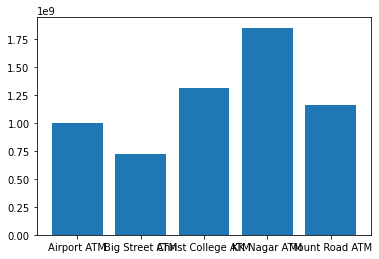

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Jumlah Total Penarikan Masing-masing ATM

nama_atm = np.array(["Airport ATM", "Big Street ATM", "Christ College ATM", "KK Nagar ATM","Mount Road ATM"])
jumlah_penarikan = np.array([999511100, 726419500,1311309000,1854299300,1161463900])

plt.bar(nama_atm, jumlah_penarikan)
plt.show()

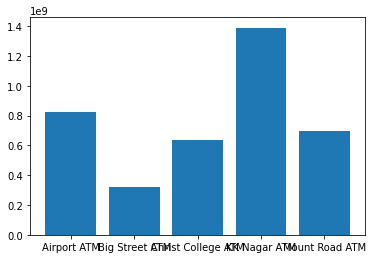

In [ ]:
# 2. Jumlah Total Penarikan Dengan Kartu XYZ Masing-masing ATM
jumlah_penarikan_XYZ = np.array([827094200, 323523900,639314100,1389992600,697295100])

plt.bar(nama_atm, jumlah_penarikan_XYZ)
plt.show()

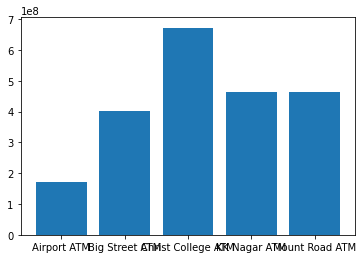

In [ ]:
# 3. Jumlah Total Penarikan Dengan Kartu Lain Masing-masing ATM
jumlah_penarikan_kartu_lain = np.array([172416900,402895600,671994900,464306700,464168800])

plt.bar(nama_atm, jumlah_penarikan_kartu_lain)
plt.show()

## Visualisasi Data Dengan Menggunakan Chart Pie

In [ ]:
import plotly.graph_objects as go

In [ ]:
# 1. Jumlah Total Penarikan Masing-masing ATM
fig = go.Figure(data=[go.Pie(labels = nama_atm, values = jumlah_penarikan)])
fig.show()

In [ ]:
# 2. Jumlah Total Penarikan Dengan Kartu XYZ Masing-masing ATM
fig = go.Figure(data=[go.Pie(labels = nama_atm, values = jumlah_penarikan_XYZ)])
fig.show()

In [ ]:
# 3. Jumlah Total Penarikan Dengan Kartu Lain Masing-masing ATM
fig = go.Figure(data=[go.Pie(labels = nama_atm, values = jumlah_penarikan_kartu_lain)])
fig.show()